# SI 618 Group Project

## Project Title: Exploring the Relationship among Car Sales and Car Features and Demographic Attributes Across Seven U.S. States


##Team Members:
Ruize Ma - ruizekk, Yiyang Shi - yiyangsh, Samantha Hsu - hsusam



##Overview:
This project delves into the intricate interplay between car sales and diverse demographic attributes across seven U.S. states. Its primary goal is to unveil the shared traits among purchasers of particular vehicles, while also discerning overarching trends within distinct population categories and their consumption patterns in the automotive market.


## Motivation:

Our project explores the intricate relationship between car sales and population attributes across 7 U.S. states, inspired by our shared academic background in industrial engineering. This exploration not only aligns with our academic pursuits but also intersects with our career interests in supply chain analysis and inventory management. By engaging with real-world data, we seek to bridge our academic knowledge with practical insights, enhancing our competencies in areas crucial to our future professional journeys.

### Questions:

1. **State-Level Car Sales Trends:** How do demographic and economic factors influence car sales volume across different states?
   - We aim to understand the broad impact of demographic and economic factors (like population size and median income) on car sales volumes across states. Identifying these macro-level trends can inform automotive market strategies, highlighting opportunities and challenges in different regional markets.

2. **Demographic Preferences for Car Models:** What specific demographic attributes correlate with preferences for certain car models?
   - By examining specific demographic attributes (such as age, income bracket, and racial composition) and their correlation with preferences for particular car models, we seek to uncover detailed consumer behavior patterns. This analysis will reveal nuanced preferences within different demographic segments, offering insights into targeted marketing strategies.

3. **Environmental Impact Considerations:** How do car features related to fuel efficiency and emissions correlate with demographic and regional economic profiles?
   - With growing concerns over environmental sustainability, this question explores the relationship between fuel-efficient and low-emission vehicles and the demographic and economic characteristics of their buyers. Are certain regions or demographic groups more inclined towards eco-friendly vehicles? This inquiry aims to uncover patterns that could guide car manufacturers in developing and marketing environmentally friendly models, aligning product offerings with consumer values and regional preferences.



## Data Sources

1. **American Community Survey (ACS) Data:**
   - We obtained demographic and socio-economic data, such as population, median income, median house value, and demographic breakdown (number of white, black, indigenous, Asian, islanders, and others), from the American Community Survey (ACS) using Python.
   - We accessed this data via the ACS API by obtaining an API key and pulling the relevant variables at the county level for specific states including Connecticut, Colorado, South Carolina, Washington, Wisconsin, Arizona, and Texas.
   - Link to this source: https://www.census.gov/programs-surveys/acs/data/data-via-api.html

2. **Car Sale Dataset (Kaggle):**
   - We acquired the dataset containing information about car sales, customer demographics, vehicle details, and dealership information from Kaggle.
   - It includes variables such as customer name, gender, annual income, dealer name, company, model, engine, transmission, color, price, dealer number, body style, phone, and dealer region.
   - By merging the car sale dataset with the ACS dataset based on the dealer region and state information, we can explore relationships between car sales and demographic/economic factors. This integration allows us to analyze whether there's a correlation between median income levels in a county and the types of cars sold in that area.
   - Link to this source: https://www.kaggle.com/datasets/missionjee/car-sales-report

By utilizing the Python programming language and libraries, we were able to access, clean, and preprocess the data from both the ACS API and Kaggle dataset, ensuring that it is ready for analysis. The combination of these datasets allows for a comprehensive examination of car sales patterns, demographic characteristics, and car attributes, facilitating informed decision-making and insights for our project.

## Data Description

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
car_sales_url = 'https://raw.githubusercontent.com/yiyangshi-hub/SI_618_Final_Project/main/data/car_sale.csv'
states_census_url = 'https://raw.githubusercontent.com/yiyangshi-hub/SI_618_Final_Project/main/data/states_census.csv'

In [31]:
car_sales = pd.read_csv(car_sales_url)
states_census = pd.read_csv(states_census_url)

In [32]:
print("Number of missing values in car_sales:\n", car_sales.isna().sum())
print("++++++++++++++++++")
print("Number of missing values in states_census:\n", states_census.isna().sum())

Number of missing values in car_sales:
 Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64
++++++++++++++++++
Number of missing values in states_census:
 population           0
median_income        0
median_house_val     0
num_of_white         0
num_of_black         0
num_of_indigenous    0
num_of_asian         0
num_of_islanders     0
num_of_others        0
state                0
county               0
dtype: int64


In [33]:
print("Size of car_sales:", car_sales.shape)
print("Size of states_census:", states_census.shape)

Size of car_sales: (23906, 16)
Size of states_census: (497, 11)



### **Car Sales Dataset Overview:**
- **Dataset Dimensions:** This dataset contains 23906 rows and 16 columns.

- **Variables of Interest:**
  1. **Car_id:** A unique identifier for each car sold.
  2. **Date:** The date of the sale.
  3. **Customer Name:** The name of the customer.
  4. **Gender:** The gender of the purchaser.
  5. **Annual Income:** The annual income of the purchaser.
  6. **Dealer_Name:** The name of the dealership.
  7. **Company:** The car manufacturer.
  8. **Model:** The model of the car sold.
  9. **Engine:** Information about the car's engine.
  10. **Transmission:** The type of transmission.
  11. **Color:** The color of the car.
  12. **Price ($):** The sale price of the car.
  13. **Dealer_No:** A unique identifier for each dealership.
  14. **Body Style:** The body style of the car (e.g., SUV, sedan).
  15. **Phone:** The contact phone number associated with the car sale.
  16. **Dealer_Region:** The geographical region of the dealership.
- **Data Completeness:** This dataset is fully populated, with no missing values detected.



### **States Census Datasets Overview:**
- **Dataset Dimensions:** This dataset contains 498 rows and 11 columns.

- **Variables of Interest:**
  1. **Population:** The total population of the area.
  2. **Median_Income:** The median income of the area.
  3. **Median_House_Val:** The median house value.
  4. **Num_of_White:** The number of individuals identifying as White.
  5. **Num_of_Black:** The number of individuals identifying as Black or African American.
  6. **Num_of_Indigenous:** The number of individuals identifying as American Indian or Alaska Native.
  7. **Num_of_Asian:** The number of individuals identifying as Asian.
  8. **Num_of_Islanders:** The number of individuals identifying as Native Hawaiian or Other Pacific Islanders.
  9. **Num_of_Others:** The number of individuals identifying as some other race alone.
  10. **State:** The state in which the area is located.
  11. **County:** The specific county represented by number.
- **Data Completeness:** This dataset is fully populated, with no missing values detected.

## Data Manipulation

In [34]:
# assign the state name based on city to car_sales data
region_to_state = {
    'Middletown': 'CT',
    'Aurora': 'CO',
    'Greenville': 'SC',
    'Pasco': 'WA',
    'Janesville': 'WI',
    'Scottsdale': 'AZ',
    'Austin': 'TX'
}

car_sales['state'] = car_sales['Dealer_Region'].map(region_to_state)

In [35]:
# Aggregate the data to state level. Take the sum of population, num_of_white, num_of_black, ..., num_of_others
# take the mean of median_income and median_house_val

states_census_withouth_county = states_census.groupby('state').agg({
    'population' : 'sum',
    'num_of_white': 'sum',
    'num_of_black': 'sum',
    'num_of_indigenous': 'sum',
    'num_of_asian': 'sum',
    'num_of_islanders': 'sum',
    'num_of_others': 'sum',
    'median_income': 'mean',
    'median_house_val': 'mean'
})

In [36]:
# Merge car_sales and states_census_without_county
car_sales_census = pd.merge(car_sales, states_census_withouth_county, how = 'left', on = 'state')
car_sales_census.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,...,state,population,num_of_white,num_of_black,num_of_indigenous,num_of_asian,num_of_islanders,num_of_others,median_income,median_house_val
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,...,CT,3605330.0,2595884.0,389290.0,8714.0,167308.0,1262.0,215605.0,83896.250000,2.824000e+05
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,...,CO,5723176.0,4507448.0,234065.0,53143.0,183391.0,8192.0,258867.0,64908.109375,3.074344e+05
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,...,SC,5078903.0,3334961.0,1328691.0,15595.0,83441.0,4545.0,109896.0,50335.021739,1.421348e+05
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,...,WA,7617364.0,5465011.0,293401.0,90789.0,682711.0,50902.0,378956.0,66068.282051,3.038179e+05
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,...,WI,5871661.0,4894019.0,372439.0,45831.0,166670.0,2862.0,130363.0,63682.638889,1.767514e+05
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,...,AZ,7079203.0,4985729.0,318827.0,300862.0,234495.0,13979.0,490290.0,54336.800000,1.842533e+05
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,...,TX,28862498.0,18565945.0,3499862.0,147892.0,1452712.0,24608.0,2019394.0,57221.351779,-2.500496e+06
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,...,TX,28862498.0,18565945.0,3499862.0,147892.0,1452712.0,24608.0,2019394.0,57221.351779,-2.500496e+06
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,...,WA,7617364.0,5465011.0,293401.0,90789.0,682711.0,50902.0,378956.0,66068.282051,3.038179e+05
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,...,AZ,7079203.0,4985729.0,318827.0,300862.0,234495.0,13979.0,490290.0,54336.800000,1.842533e+05


In [37]:
car_sales_census.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'state', 'population', 'num_of_white', 'num_of_black',
       'num_of_indigenous', 'num_of_asian', 'num_of_islanders',
       'num_of_others', 'median_income', 'median_house_val'],
      dtype='object')

## Data Visualization

In [38]:
#Relationship between Number of car sales and Population in each state
#Count the number of rows for each state
state_car_sales = car_sales_census.groupby('state').size()

#Create a dataframe with population and state car sales
state_car_sales = state_car_sales.reset_index()
state_car_sales.columns = ['state', 'num_of_sales']

#Merge the state_car_sales with states_census_without_county to get the population
state_car_sales = pd.merge(state_car_sales, states_census_withouth_county, how = 'left', on = 'state')
state_car_sales


,state,num_of_sales,population,num_of_white,num_of_black,num_of_indigenous,num_of_asian,num_of_islanders,num_of_others,median_income,median_house_val
0,AZ,3433,7079203.0,4985729.0,318827.0,300862.0,234495.0,13979.0,490290.0,54336.800000,1.842533e+05
1,CO,3130,5723176.0,4507448.0,234065.0,53143.0,183391.0,8192.0,258867.0,64908.109375,3.074344e+05
2,CT,3128,3605330.0,2595884.0,389290.0,8714.0,167308.0,1262.0,215605.0,83896.250000,2.824000e+05
3,SC,3128,5078903.0,3334961.0,1328691.0,15595.0,83441.0,4545.0,109896.0,50335.021739,1.421348e+05
4,TX,4135,28862498.0,18565945.0,3499862.0,147892.0,1452712.0,24608.0,2019394.0,57221.351779,-2.500496e+06
5,WA,3131,7617364.0,5465011.0,293401.0,90789.0,682711.0,50902.0,378956.0,66068.282051,3.038179e+05
6,WI,3821,5871661.0,4894019.0,372439.0,45831.0,166670.0,2862.0,130363.0,63682.638889,1.767514e+05


Text(0, 0.5, 'Number of Car Sales')

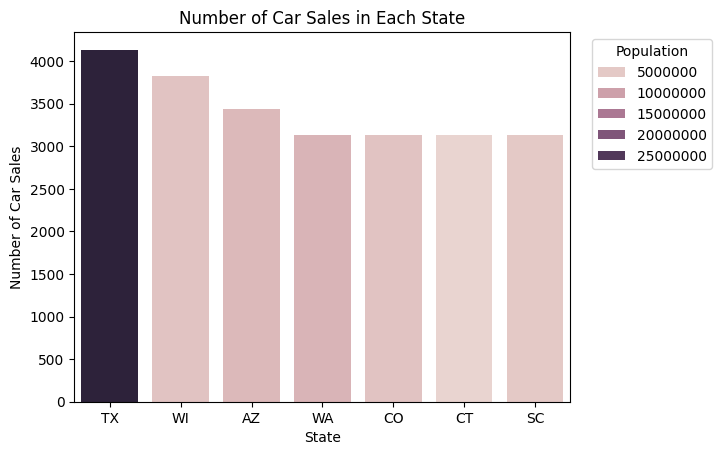

In [39]:
#Barplot showing relationship between Number of car sales and Population in each state
ax = sns.barplot(data = state_car_sales, x = 'state', y = 'num_of_sales', hue = 'population', order = state_car_sales.sort_values('num_of_sales', ascending = False).state)
ax.legend(loc = 'upper right', bbox_to_anchor=(1.3, 1), title = 'Population')
ax.set_title('Number of Car Sales in Each State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Car Sales')

In [40]:
#Show correlation between demographic and sales
#Create new dataframe that contains number os sales for each state and corresponding demographic for each state
state_demographic = car_sales_census.groupby('state').agg({
    'num_of_white': 'mean',
    'num_of_black': 'mean',
    'num_of_indigenous': 'mean',
    'num_of_asian': 'mean',
    'num_of_islanders': 'mean',
    'num_of_others': 'mean'
}).reset_index()

#Add number of sales column to demographic dataframe
state_demographic['num_of_sales'] = state_car_sales['num_of_sales']
#Remove state column to create heatmap
state_demographic = state_demographic.drop(columns = 'state')
state_demographic

,num_of_white,num_of_black,num_of_indigenous,num_of_asian,num_of_islanders,num_of_others,num_of_sales
0,4985729.0,318827.0,300862.0,234495.0,13979.0,490290.0,3433
1,4507448.0,234065.0,53143.0,183391.0,8192.0,258867.0,3130
2,2595884.0,389290.0,8714.0,167308.0,1262.0,215605.0,3128
3,3334961.0,1328691.0,15595.0,83441.0,4545.0,109896.0,3128
4,18565945.0,3499862.0,147892.0,1452712.0,24608.0,2019394.0,4135
5,5465011.0,293401.0,90789.0,682711.0,50902.0,378956.0,3131
6,4894019.0,372439.0,45831.0,166670.0,2862.0,130363.0,3821


Text(0.5, 1.0, 'Correlation between Demographics and Number of Sales')

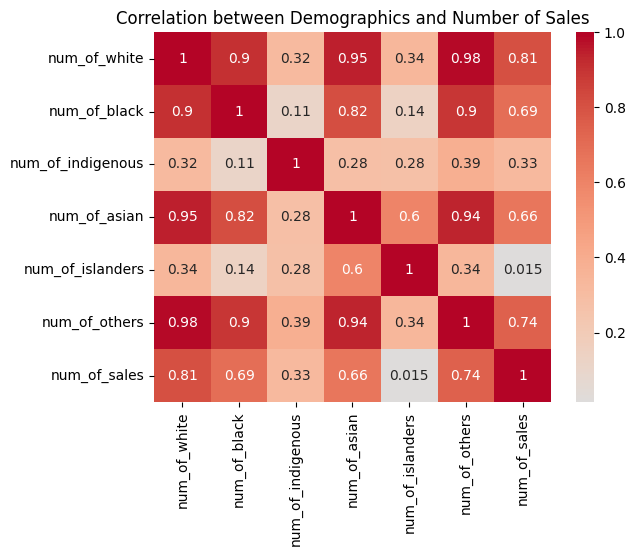

In [41]:
#Show correlation between demographic and sales
correlation = state_demographic.corr()
ax2 = sns.heatmap(correlation, annot = True, cmap = 'coolwarm', center = 0)
ax2.set_title('Correlation between Demographics and Number of Sales')

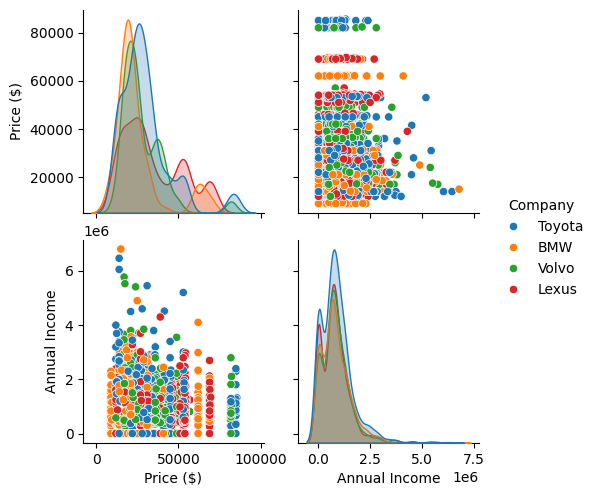

In [42]:
# Show the relationship between price and annual income for the 4 companies
selected_companies = ['Lexus', 'BMW', 'Volvo', 'Toyota']
filtered_data = car_sales_census[car_sales_census['Company'].isin(selected_companies)]


sns.pairplot(data=filtered_data, hue='Company', vars=['Price ($)', 'Annual Income'])
